In [1]:
import model as m
from sklearn.linear_model import LogisticRegression
# we intend to test each solver independently and then compare them afterwards
clf_newton = m.Classifier(1,LogisticRegression(solver ='newton-cg'))
clf_saga = m.Classifier(1,LogisticRegression(solver ='saga'))
clf_lib = m.Classifier(1,LogisticRegression(solver ='liblinear'))
clf_sag = m.Classifier(1,LogisticRegression(solver ='sag'))
clf_general = m.Classifier(1,LogisticRegression()) # can be used after to furher improve


In [1]:
#stop word sets specified for this data set
path = "../data/stop_words_news_groups/"
with open(path+"stop_words_no_numbers.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_no_nums = frozenset(content)
with open(path+"stop_words_with_nums.txt", 'r') as content_file:
        content = content_file.read().replace(" ","").replace("\n","").split(",")
        stop_words_with_nums = frozenset(content)

In [4]:
params_trial_1 = { 
            #penalty is l2 by default
            'vect__max_features': (1000, 10000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ((1, 1), (1, 2)),
            'tfidf__norm': ('l1','l2',None),
            'vect__stop_words' : [stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([50,150,250]), #two extremes
            'clf__C':(10,1.0),
            }
#### TEST 1 looking at saga ####
clf_saga.fit(params_trial_1,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 23.9min finished


done in 1441.918s

scores!
mean: 0.573 std: (+/-0.007) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.581 std: (+/-0.009) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.571 std: (+/-0.006) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 0}
mean: 0.581 std: (+/-0.009) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 1000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.706 std: (+/-0.010) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.707 std: (+/-0.010) for {'clf__C': 10, 'clf__max_iter': 50, 'tfidf__norm': 'l1', 'vect__max_features': 10000, 'vect__ng

[]
Evaluation on test set:

Accuracy Score : 0.662639405204461
Precision Score : 0.662639405204461
Recall Score : 0.662639405204461
F1 Score : 0.662639405204461
Confusion Matrix
[[150   2   2   1   1   0   3  13   7   3   2   1   5  10  11  47   8   8
    9  36]
 [  3 268  22  11   7  23   9  10   1   6   0   5   9   3   9   1   1   1
    0   0]
 [  2  24 239  37  17  11   2  19   2   1   1   5   3   9   9   2   1   3
    3   4]
 [  0  20  34 245  25   8  17   9   1   2   2   1  26   0   1   0   0   1
    0   0]
 [  2  11  10  30 252   3  15  19   4   2   1   3  23   4   3   0   1   1
    0   1]
 [  0  43  35  13   1 269   3  13   3   2   0   4   5   1   0   0   2   1
    0   0]
 [  1   2   5  23  16   0 296  18   5   0   1   1   8   2   4   2   2   1
    1   2]
 [  4   2   4   1   4   2  11 294  23   4   1   0  19   3   5   1   2   5
    8   3]
 [  4   2   1   2   1   1   5  49 282   4   1   0  12   5   8   1   4   1
   10   5]
 [  1   3   0   1   0   1   6  25   5 302  24   0   3   3

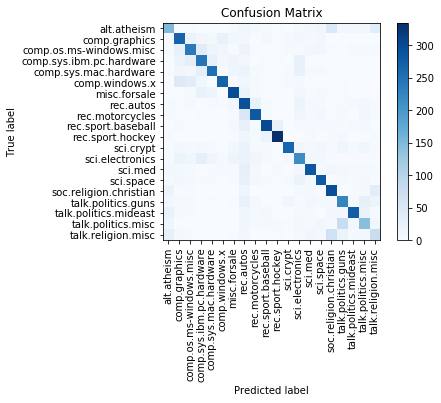

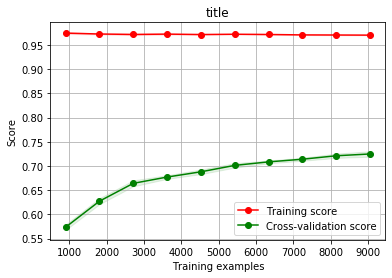

Finding most common params for the top 108 values
[{10: 54, 1.0: 54}, {50: 36, 150: 36, 250: 36}, {None: 12, 'l1': 48, 'l2': 48}, {10000: 60, 1000: 48}, {(1, 2): 54, (1, 1): 54}, {1: 60, 0: 48}]


In [6]:
clf_saga.eval_on_test([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [20]:
clf_saga.eval_best_n_params(0.8) #top 30%

Finding most common params for the top 29 values
[{10: 17, 1.0: 12}, {150: 10, 50: 10, 250: 9}, {'l1': 5, 'l2': 24}, {10000: 29}, {(1, 1): 17, (1, 2): 12}, {0: 14, 1: 15}]


In [4]:
#from this result we can see that this creates a high variance. Further more we can see more success with 
#params that create complexity further showing overfitting
#in order to combat this  we are looking to change the params in the follwoing ways
    #1) we saw more success with l2 penalty so we will use that from now on
    #2) no clear winner was seen with stop words (but "stop_words_with_nums" reduces complexity more)
    #3) n_grams(1,1) reduces complexity
    #4) increase C
    #5) reduce max_features
    #6
params_trial_2 = { 
            #penalty is l2 by default
            'vect__max_features': (8000,10000,12000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 1),(1, 2)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [None,stop_words_no_nums, stop_words_with_nums],
            'clf__max_iter': ([100,150,200]), #two extremes
            'clf__C':(15,10,5),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_2,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 34.2min finished


done in 2055.885s

scores!
mean: 0.707 std: (+/-0.017) for {'clf__C': 15, 'clf__max_iter': 100, 'tfidf__norm': 'l2', 'vect__max_features': 8000, 'vect__ngram_range': (1, 1), 'vect__stop_words': None}
mean: 0.711 std: (+/-0.008) for {'clf__C': 15, 'clf__max_iter': 100, 'tfidf__norm': 'l2', 'vect__max_features': 8000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 1}
mean: 0.709 std: (+/-0.007) for {'clf__C': 15, 'clf__max_iter': 100, 'tfidf__norm': 'l2', 'vect__max_features': 8000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 2}
mean: 0.683 std: (+/-0.011) for {'clf__C': 15, 'clf__max_iter': 100, 'tfidf__norm': 'l2', 'vect__max_features': 8000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
mean: 0.708 std: (+/-0.012) for {'clf__C': 15, 'clf__max_iter': 100, 'tfidf__norm': 'l2', 'vect__max_features': 8000, 'vect__ngram_range': (1, 2), 'vect__stop_words': 1}
mean: 0.708 std: (+/-0.008) for {'clf__C': 15, 'clf__max_iter': 100, 'tfidf__norm': 'l2', 'vect__max_features': 8000,

Evaluation on test set:

Accuracy Score : 0.6715347849176846
Precision Score : 0.6715347849176846
Recall Score : 0.6715347849176846
F1 Score : 0.6715347849176846
Confusion Matrix
[[148   2   3   1   1   0   3   3   7  12   2   1   4   7  13  50   8  10
   11  33]
 [  3 274  23  10   7  17   9   4   1  11   1   5  10   2   9   1   1   1
    0   0]
 [  2  25 241  36  15  12   2   4   2  17   1   3   3   8  10   3   1   2
    4   3]
 [  1  16  32 255  25   6  16   2   1   8   2   2  25   0   1   0   0   0
    0   0]
 [  3  11  10  32 259   2  13   6   1  16   1   2  21   3   3   0   1   0
    0   1]
 [  0  43  38  11   2 266   4   2   2  10   0   3   5   1   3   0   3   1
    0   1]
 [  1   2   3  23  16   0 300   7   6   8   1   1   9   1   4   1   3   1
    1   2]
 [  4   3   1   1   4   2  11 274  23  29   1   0  19   4   6   1   2   3
    6   2]
 [  3   3   1   2   0   1   6  32 289  20   0   0  10   5  10   1   3   0
    8   4]
 [  1   3   0   2   0   1   7   6   5 319  25   0   3   

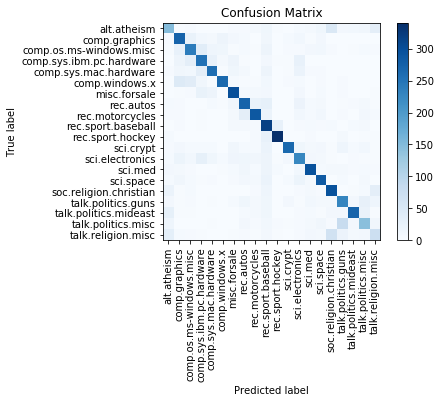

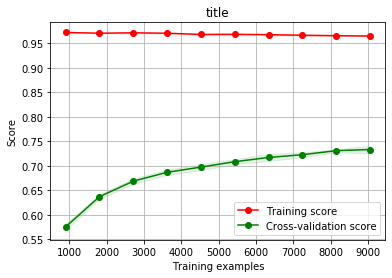

In [5]:
clf_saga.eval_on_test([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [7]:
clf_saga.eval_best_n_params(0.9) #top 20%

Finding most common params for the top 17 values
[{15: 2, 10: 6, 5: 9}, {100: 6, 150: 6, 200: 5}, {'l2': 17}, {12000: 17}, {(1, 1): 14, (1, 2): 3}, {1: 11, 2: 6}]


In [8]:
# WE SEE AN IMPROVEMNET OF 1%
# we consistently more sucess with stop words 0 and  n_grams(1,1) so we will fix these for a quick test
#and try to further pinpoint max_feauture,Max_iter, and C
params_trial_3 = { 
            #penalty is l2 by default
            'vect__max_features': (11000,12000,15000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 1)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__max_iter': ([175,200,250]), #two extremes
            'clf__C':(7.5,5,2.5),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.2min finished


done in 198.780s

scores!
mean: 0.730 std: (+/-0.011) for {'clf__C': 7.5, 'clf__max_iter': 175, 'tfidf__norm': 'l2', 'vect__max_features': 11000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.732 std: (+/-0.015) for {'clf__C': 7.5, 'clf__max_iter': 175, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.739 std: (+/-0.014) for {'clf__C': 7.5, 'clf__max_iter': 175, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.730 std: (+/-0.011) for {'clf__C': 7.5, 'clf__max_iter': 200, 'tfidf__norm': 'l2', 'vect__max_features': 11000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.732 std: (+/-0.015) for {'clf__C': 7.5, 'clf__max_iter': 200, 'tfidf__norm': 'l2', 'vect__max_features': 12000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.739 std: (+/-0.014) for {'clf__C': 7.5, 'clf__max_iter': 200, 'tfidf__norm': 'l2', 'vect__max_features': 1

Evaluation on test set:

Accuracy Score : 0.6755177907594264
Precision Score : 0.6755177907594264
Recall Score : 0.6755177907594264
F1 Score : 0.6755177907594264
Confusion Matrix
[[146   2   3   1   1   1   2   2   8  12   2   1   4   6  15  51   9   9
   11  33]
 [  3 276  23   8   7  16   9   4   1  10   1   6  12   1   9   1   1   1
    0   0]
 [  2  24 239  36  15  13   3   4   2  16   1   3   2   8  12   3   1   2
    5   3]
 [  1  13  36 253  25   6  15   3   1   8   2   2  25   0   1   0   1   0
    0   0]
 [  3  10   9  29 261   2  15   6   1  16   2   2  20   3   3   0   3   0
    0   0]
 [  0  43  38  11   2 267   2   2   2  10   0   3   5   1   4   0   3   1
    0   1]
 [  0   2   3  21  14   0 304   9   6   9   1   1  11   1   2   0   3   0
    1   2]
 [  5   3   1   1   3   3  11 276  24  27   2   0  18   3   5   2   2   2
    7   1]
 [  3   3   1   2   0   1   6  28 291  20   0   0  11   6  11   1   3   0
    8   3]
 [  1   3   0   1   0   1   6   4   6 327  23   0   2   

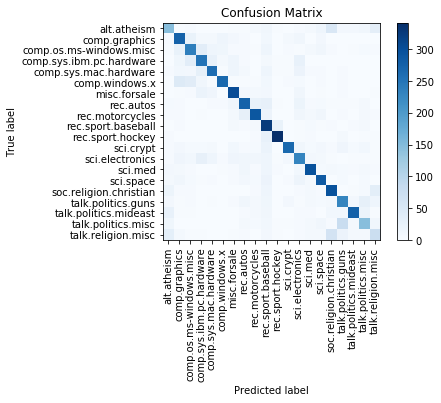

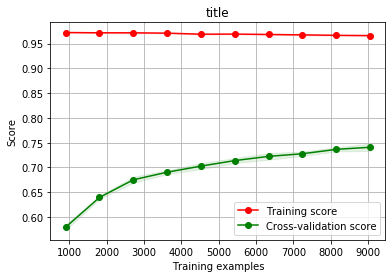

In [9]:
clf_saga.eval_on_test([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [17]:
clf_saga.eval_best_n_params(0.8) #top 20%

Finding most common params for the top 6 values
[{7.5: 1, 2.5: 2, 5: 3}, {250: 2, 200: 2, 175: 2}, {'l2': 6}, {15000: 6}, {(1, 1): 6}, {0: 6}]


In [18]:
#0.4 increase
#lets try to maximize this improvement before trying new things
params_trial_3 = { 
            #penalty is l2 by default
            'vect__max_features': (15000,16000,20000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 1)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__max_iter': ([190,200,210]), #two extremes
            'clf__C':(5.5,5,4.5),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_3,5)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  3.3min finished


done in 201.493s

scores!
mean: 0.740 std: (+/-0.016) for {'clf__C': 5.5, 'clf__max_iter': 190, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.741 std: (+/-0.012) for {'clf__C': 5.5, 'clf__max_iter': 190, 'tfidf__norm': 'l2', 'vect__max_features': 16000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.745 std: (+/-0.008) for {'clf__C': 5.5, 'clf__max_iter': 190, 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.740 std: (+/-0.016) for {'clf__C': 5.5, 'clf__max_iter': 200, 'tfidf__norm': 'l2', 'vect__max_features': 15000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.741 std: (+/-0.012) for {'clf__C': 5.5, 'clf__max_iter': 200, 'tfidf__norm': 'l2', 'vect__max_features': 16000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.745 std: (+/-0.008) for {'clf__C': 5.5, 'clf__max_iter': 200, 'tfidf__norm': 'l2', 'vect__max_features': 2

Evaluation on test set:

Accuracy Score : 0.679368029739777
Precision Score : 0.679368029739777
Recall Score : 0.679368029739777
F1 Score : 0.679368029739777
Confusion Matrix
[[147   2   3   1   1   1   2   3   7  12   2   1   4   6  15  46   9   9
   11  37]
 [  3 276  21   9   7  18   9   3   1  11   0   5  12   2   9   1   1   1
    0   0]
 [  2  23 239  38  16  12   6   4   1  17   1   3   2   8  10   2   1   2
    5   2]
 [  0  12  39 257  23   7  14   2   1   9   2   2  23   0   1   0   0   0
    0   0]
 [  3  10   9  27 263   2  17   4   1  16   1   3  20   3   3   0   2   0
    0   1]
 [  0  44  37  11   1 269   2   2   2  10   0   3   5   1   4   0   3   0
    0   1]
 [  1   2   4  20  15   0 304   8   5   9   1   1  12   1   2   0   3   0
    1   1]
 [  3   2   1   2   2   1  12 280  24  28   2   0  18   2   7   1   3   2
    5   1]
 [  3   3   1   1   0   1   6  26 297  18   1   0  11   6   9   1   3   0
    8   3]
 [  1   3   0   1   0   2   6   3   5 327  23   0   2   4   

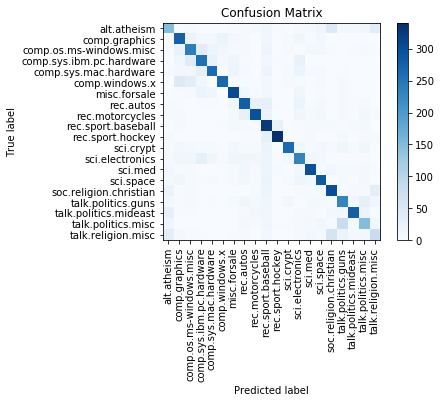

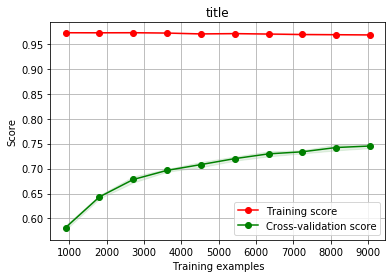

In [19]:
clf_saga.eval_on_test([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [23]:
clf_saga.eval_best_n_params(0.7) #top 20%

Finding most common params for the top 9 values
[{4.5: 3, 5.5: 3, 5: 3}, {190: 3, 210: 3, 200: 3}, {'l2': 9}, {20000: 9}, {(1, 1): 9}, {0: 9}]


Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  8.6min finished


done in 525.027s

scores!
mean: 0.745 std: (+/-0.010) for {'clf__C': 7, 'clf__max_iter': 205, 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.748 std: (+/-0.008) for {'clf__C': 7, 'clf__max_iter': 205, 'tfidf__norm': 'l2', 'vect__max_features': 25000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.751 std: (+/-0.009) for {'clf__C': 7, 'clf__max_iter': 205, 'tfidf__norm': 'l2', 'vect__max_features': 30000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.756 std: (+/-0.009) for {'clf__C': 7, 'clf__max_iter': 205, 'tfidf__norm': 'l2', 'vect__max_features': 50000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.745 std: (+/-0.010) for {'clf__C': 7, 'clf__max_iter': 210, 'tfidf__norm': 'l2', 'vect__max_features': 20000, 'vect__ngram_range': (1, 1), 'vect__stop_words': 0}
mean: 0.748 std: (+/-0.008) for {'clf__C': 7, 'clf__max_iter': 210, 'tfidf__norm': 'l2', 'vect__max_features': 25000, 'vect_

Accuracy Score : 0.6906532129580457
Precision Score : 0.6906532129580457
Recall Score : 0.6906532129580457
F1 Score : 0.6906532129580457
Confusion Matrix
[[151   2   4   1   1   1   2  13   5   4   1   1   4   6  13  50   9  10
    9  32]
 [  4 283  16   8   7  18   9   9   3   4   0   6   9   2   8   1   1   1
    0   0]
 [  2  18 243  41  16  11   6  20   2   1   1   4   1   8  10   2   1   1
    4   2]
 [  1  12  36 260  24   6  14   9   0   1   2   2  24   0   1   0   0   0
    0   0]
 [  3   8  10  26 264   2  14  21   1   2   1   3  20   3   3   0   2   1
    0   1]
 [  0  44  37  10   1 273   2   9   1   2   0   3   4   1   4   0   3   0
    0   1]
 [  1   2   2  20  15   0 307  15   5   1   2   1  10   1   2   1   2   1
    1   1]
 [  4   1   1   3   2   1  12 307  20   4   2   0  19   3   7   1   1   2
    5   1]
 [  3   3   1   0   1   1   6  37 304   6   0   0  10   4   7   1   4   0
    8   2]
 [  1   2   0   1   0   2   5  21   4 318  19   0   2   5   2   4   2   2
    7  

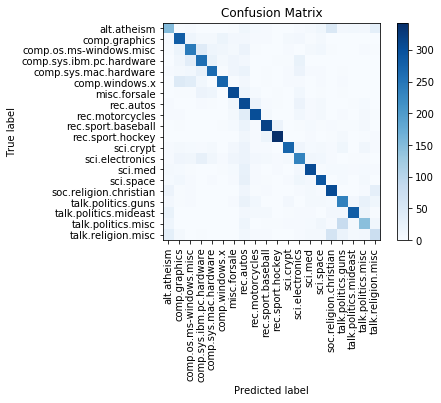

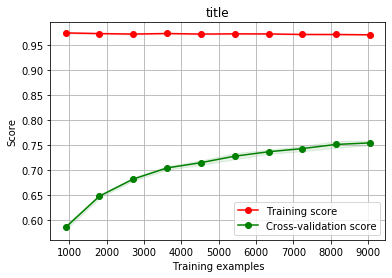

Finding most common params for the top 20 values
[{6.5: 5, 5.5: 7, 6: 4, 7: 4}, {210: 6, 230: 5, 205: 5, 220: 4}, {'l2': 20}, {30000: 4, 50000: 16}, {(1, 1): 20}, {0: 20}]


In [26]:
#Almost 0.68!!
#0.4 increase
#Going to attempt a very complex model
params_trial_4 = { 
            #penalty is l2 by default
            'vect__max_features': (20000,25000,30000,50000), # we dont want features to exceed observations (because of overfitting)
            'vect__ngram_range': ([(1, 1)]),
            'tfidf__norm': (['l2']),
            'vect__stop_words' : [stop_words_no_nums],
            'clf__max_iter': ([205,210,220,230]), #two extremes
            'clf__C':(7,6.5,6,5.5),
            }
#### TEST 2 looking at saga ####
clf_saga.fit(params_trial_4,5)
clf_saga.eval_on_test([],False)
clf_saga.learning_curve([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
clf_saga.eval_best_n_params(0.7) #top 20%